In [1]:
# importing the dependancies
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
# read the dataset
df = pd.read_csv('episode.csv')

# top 2 rows of the dataset
df.head(2)

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,Original_image_link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68.0,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60.0,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


### Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.


Total Seasons of the show: 4
season
1    8.0900
2    8.0000
3    7.7750
4    7.5375
Name: average_rating, dtype: float64


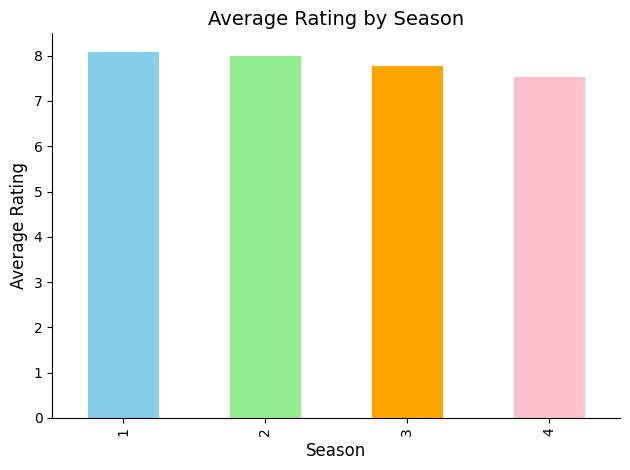

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Perform the groupby operation and calculate the mean
season_avg_rating = df.groupby('season')['average_rating'].mean()

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the graph with customizations
season_avg_rating.plot(kind='bar', color=['skyblue', 'lightgreen', 'orange', 'pink'])

# Set the labels and title of the plot
ax.set_xlabel('Season', fontsize=12)
ax.set_ylabel('Average Rating', fontsize=12)
ax.set_title('Average Rating by Season', fontsize=14)

# Set the tick label font size
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


print(f"Total Seasons of the show: {len(df['season'].unique())}")
print(season_avg_rating)

# Show the plot
plt.tight_layout()
plt.show()


### Get all the episode names, whose average rating is more than 8 for every season


In [21]:
episode_names = df[df['average_rating']>8]['name']
print(f"All the episode names, whose average rating is more than 8 for every season:\n{episode_names}")

All the episode names, whose average rating is more than 8 for every season:
6                 Trompe L'Oeil
8     The Well-Tempered Clavier
9            The Bicameral Mind
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object


### Get all the episode names that aired before May 2019


In [65]:
from datetime import datetime

# Convert the date string to a datetime object
filter_date = datetime.strptime('2019-01-05', '%Y-%m-%d')

# Filter the series to only include dates before the filter_date
filtered_series = df[df['airdate'].dt.date <= filter_date.date()]

# Print the filtered series
filtered_series[['name', 'airdate']]


,name,airdate
0,The Original,2016-10-02
1,Chestnut,2016-10-09
2,The Stray,2016-10-16
3,Dissonance Theory,2016-10-23
4,Contrapasso,2016-10-30
5,The Adversary,2016-11-06
6,Trompe L'Oeil,2016-11-13
7,Trace Decay,2016-11-20
8,The Well-Tempered Clavier,2016-11-27
9,The Bicameral Mind,2016-12-04


### Get the episode name from each season with the highest and lowest rating


In [117]:
import IPython.display as display

# Find the indices of rows with highest rating for each season
max_rating_indices = df.groupby('season')['average_rating'].idxmax()

# Find the indices of rows with lowest rating for each season
min_rating_indices = df.groupby('season')['average_rating'].idxmin()

# Get the episode name for each season with the highest rating
highest_rating_episodes = df.loc[max_rating_indices, ['season', 'name','average_rating']]

# Get the episode name for each season with the lowest rating
lowest_rating_episodes = df.loc[min_rating_indices, ['season', 'name','average_rating']]

# Print the highest_rating_episodes DataFrame
print("Highest Rated Episodes:")
display.display(highest_rating_episodes)

# Print the lowest_rating_episodes DataFrame
print("Lowest Rated Episodes:")
display.display(lowest_rating_episodes)


Highest Rated Episodes:


,season,name,average_rating
9,1,The Bicameral Mind,8.7
17,2,Kiksuya,8.7
20,3,Parce Domine,8.0
32,4,Zhuangzi,7.8


Lowest Rated Episodes:


,season,name,average_rating
2,1,The Stray,7.6
14,2,Akane No Mai,7.6
25,3,Decoherence,7.5
28,4,The Auguries,7.1


### Get the summary for the most popular ( ratings ) episode in every season


In [118]:
# Find the indices of rows with highest rating for each season
max_rating_indices = df.groupby('season')['average_rating'].idxmax()

# Get the summary for episode with the highest rating for each season 
highest_rating_episodes = df.loc[max_rating_indices, ['season', 'name','average_rating', 'summary']]
highest_rating_episodes

,season,name,average_rating,summary
9,1,The Bicameral Mind,8.7,Delores finds out the truth about William's fa...
17,2,Kiksuya,8.7,Another of Westworld's Host revolutionaries is...
20,3,Parce Domine,8.0,"If you're stuck in a loop, try walking in a st..."
32,4,Zhuangzi,7.8,God is bored.
